In [124]:
pip install category-encoders

  Using cached category_encoders-2.6.4-py2.py3-none-any.whl.metadata (8.0 kB)
Using cached category_encoders-2.6.4-py2.py3-none-any.whl (82 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
from category_encoders import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv("C:\\Users\\Gouri\\Downloads\\heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## PRE PROCESSING

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.duplicated().sum()

723

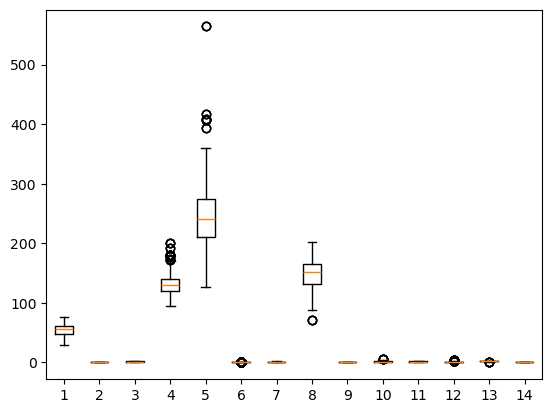

In [15]:
plt.boxplot(df)
plt.show()

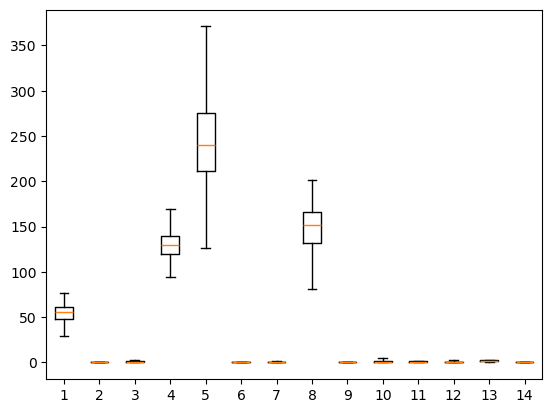

In [17]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

for col in df:
  df[col] = remove_outliers(df, col)

plt.boxplot(df)
plt.show()

In [19]:
chestpain_oh = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)
chestpain_oh

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,52,1,125,212,0,168,0,1.0,2,2.0,0,False,False,False,True,False,False,False,True
1,53,1,140,203,0,155,1,3.1,0,0.0,0,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0.0,0,False,False,False,True,False,False,False,True
3,61,1,148,203,0,161,0,0.0,2,1.0,0,False,False,False,True,False,False,False,True
4,62,0,138,294,0,106,0,1.9,1,2.5,0,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0.0,1,True,False,False,True,False,False,True,False
1021,60,1,125,258,0,141,1,2.8,1,1.0,0,False,False,False,False,False,False,False,True
1022,47,1,110,275,0,118,1,1.0,1,1.0,0,False,False,False,False,False,False,True,False
1023,50,0,110,254,0,159,0,0.0,2,0.0,1,False,False,False,False,False,False,True,False


In [27]:
bin_df=df[["sex","fbs"]]
bin_enc=BinaryEncoder()
bin_df=bin_df.astype("category")
bin_df

,sex,fbs
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
1020,1,0
1021,1,0
1022,1,0
1023,0,0


In [29]:
bin_cod=bin_enc.fit_transform(bin_df)
bin_cod

,sex_0,sex_1,fbs_0
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,1,0,1
...,...,...,...
1020,0,1,1
1021,0,1,1
1022,0,1,1
1023,1,0,1


In [34]:
std_scaler = StandardScaler()
cols=["trestbps","chol","thalach","oldpeak"]
scaled_df= std_scaler.fit_transform(df[cols])
scaled_df=pd.DataFrame(scaled_df,columns=[cols])
df[cols]=scaled_df
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,-0.378869,-0.691104,0,1,0.824084,0,-0.054537,2,2.0,3.0,0
1,53,1,0,0.528894,-0.879693,0,0,0.255654,1,1.785457,0,0.0,3.0,0
2,70,1,0,0.831481,-1.487368,0,1,-1.056105,1,1.347363,0,0.0,3.0,0
3,61,1,0,1.013034,-0.879693,0,1,0.518006,0,-0.930725,2,1.0,3.0,0
4,62,0,0,0.407859,1.027150,0,1,-1.886886,0,0.734031,1,2.5,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,0.528894,-0.502515,0,1,0.649182,1,-0.930725,2,0.0,2.0,1
1021,60,1,0,-0.378869,0.272795,0,0,-0.356500,1,1.522600,1,1.0,3.0,0
1022,47,1,0,-1.286632,0.629018,0,0,-1.362182,1,-0.054537,1,1.0,2.0,0
1023,50,0,0,-1.286632,0.188977,0,0,0.430556,0,-0.930725,2,0.0,2.0,1


## TRAIN TEST SPLIT

In [ ]:
#For regression
x1=df.drop(['chol'],axis=1)
y1=df["chol"]

In [49]:
#For classification
x2=df.drop(['target'],axis=1)
y2=df["target"]

In [51]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=2)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=2)

In [59]:
model = LinearRegression()
model.fit(x1_test, y1_test)
predicted_chol = model.predict(x1_test)
predicted_chol

array([-0.11241536,  0.79935299, -0.3114801 , -0.11241536,  0.88905627,
        0.83066244, -0.01225949,  0.07518355,  0.12760463,  0.79124458,
        0.55837199,  0.23411519,  0.36528292,  0.86120467,  0.93380049,
        0.58318743,  0.63962224,  0.32890092,  0.96857207,  0.8313013 ,
        0.55919783,  1.08881045,  0.93046502,  0.01262826,  0.21015798,
        0.43442956,  0.21072054,  0.6719743 , -0.30001287,  0.40434674,
       -0.13450289,  0.24799723,  0.76987857,  0.0043595 ,  0.29230674,
        1.09387934,  0.51827521,  0.84435733,  0.67527439,  0.77907456,
        0.69906591, -0.10821128,  0.64557179,  0.83062919, -0.16929994,
        1.08912008,  0.75221487,  0.81234114,  0.88963618,  0.3004339 ,
        0.83062919,  0.28435531,  0.16250395,  0.05155367,  0.12013395,
        0.94337697,  0.61703142,  0.67766438,  0.36528292,  0.80793026,
        0.63631236, -0.08377587,  0.60832926,  0.47523943,  0.60318622,
        0.06825659,  0.19123957,  0.62329815,  0.20968028,  0.71

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y1_test,predicted_chol)
r2=r2_score(y1_test,predicted_chol)
mae=mean_absolute_error(y1_test,predicted_chol)

In [69]:
mse

0.10638094941384148

In [71]:
r2

0.5742229143698392

In [73]:
mae

0.26345271335321635

## Classification

In [76]:
model = LogisticRegression()
model.fit(x2_test,y2_test)
y2_pred=model.predict(x2_test)

C:\Users\Gouri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
accuracy=accuracy_score(y2_test,y2_pred)
precision=precision_score(y2_test,y2_pred,average="weighted")
recall=recall_score(y2_test,y2_pred,average="weighted")
f1=f1_score(y2_test,y2_pred,average="weighted")
print("Accuracy is",accuracy,"\nPrecison is",precision,"\nRecall is",recall,"\nF1 score is",f1)

Accuracy is 0.8634146341463415 
Precison is 0.8658955661721566 
Recall is 0.8634146341463415 
F1 score is 0.8633366150873999


In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train, y2_train)
y2_predict = knn.predict(x2_test)
y2_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [112]:
accuracy=accuracy_score(y2_test,y2_predict)
precision=precision_score(y2_test,y2_predict,average="weighted")
recall=recall_score(y2_test,y2_predict,average="weighted")
f1=f1_score(y2_test,y2_predict,average="weighted")
print("Accuracy is",accuracy,"\nPrecison is",precision,"\nRecall is",recall,"\nF1 score is",f1)

Accuracy is 0.8634146341463415 
Precison is 0.8658955661721566 
Recall is 0.8634146341463415 
F1 score is 0.8633366150873999


In [106]:
naive_bayes = GaussianNB()
naive_bayes.fit(x2_train, y2_train)
y2_predicted = naive_bayes.predict(x2_test)

In [108]:
accuracy=accuracy_score(y2_test,y2_predicted)
precision=precision_score(y2_test,y2_predicted,average="weighted")
recall=recall_score(y2_test,y2_predicted,average="weighted")
f1=f1_score(y2_test,y2_predicted,average="weighted")
print("Accuracy is",accuracy,"\nPrecison is",precision,"\nRecall is",recall,"\nF1 score is",f1)

Accuracy is 0.8780487804878049 
Precison is 0.8800188869712462 
Recall is 0.8780487804878049 
F1 score is 0.8780081503963465


In [102]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y2_test, y2_pred))
print('Precision:', metrics.precision_score(y2_test, y2_pred, average='weighted'))
print('Recall:', metrics.recall_score(y2_test, y2_pred, average='weighted'))
print('F1 Score:', metrics.f1_score(y2_test, y2_pred, average='weighted'))

Accuracy: 0.8634146341463415
Precision: 0.8658955661721566
Recall: 0.8634146341463415
F1 Score: 0.8633366150873999
